In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
import scipy.optimize as opt

In [3]:
data = pd.read_csv (r'C:\Users\JOANA\Desktop\Project\Project\covid19Bulgaria2.csv')  
#print(data)
data

date  confirmed  infected  deaths  recovered  new
0   12-03-2020         23        22       1          0   16
1   13-03-2020         31        30       1          0    8
2   14-03-2020         41        39       2          0   10
3   15-03-2020         51        49       2          0   10
4   16-03-2020         62        60       2          0   11
5   17-03-2020         81        79       2          0   19
6   18-03-2020         92        90       2          0   11
7   19-03-2020        107       104       3          0   15
8   20-03-2020        127       123       3          1   20
9   21-03-2020        163       157       3          3   36
10  22-03-2020        187       181       3          3   24
11  23-03-2020        201       195       3          3   14
12  24-03-2020        218       212       3          3   17
13  25-03-2020        242       235       3          4   24
14  26-03-2020        264       253       3          8   22
15  27-03-2020        293       281       3          9   29
16  28-03-2020        331       313       7         11   38
17  29-03-2020        346       324       8         14   15
18  30-03-2020        359       334       8         17   13
19  31-03-2020        399       374       8         17   40
20  01-04-2020        422       392      10         20   23
21  02-04-2020        457       422      10         25   35
22  03-04-2020        485       441      14         30   28
23  04-04-2020        503       452      17         34   18
24  05-04-2020        531       474      20         37   28
25  06-04-2020        549       488      22         39   18
26  07-04-2020        577       512      23         42   28

In [4]:
df = pd.DataFrame(data, columns= ['confirmed','infected','new'])
#df
print(df)

confirmed  infected  new
0          23        22   16
1          31        30    8
2          41        39   10
3          51        49   10
4          62        60   11
5          81        79   19
6          92        90   11
7         107       104   15
8         127       123   20
9         163       157   36
10        187       181   24
11        201       195   14
12        218       212   17
13        242       235   24
14        264       253   22
15        293       281   29
16        331       313   38
17        346       324   15
18        359       334   13
19        399       374   40
20        422       392   23
21        457       422   35
22        485       441   28
23        503       452   18
24        531       474   28
25        549       488   18
26        577       512   28


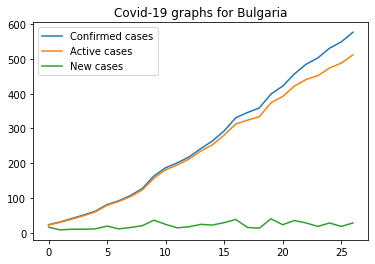

In [5]:
plt.plot(df['confirmed'], label = "Confirmed cases")
plt.plot(df['infected'], label = "Active cases")
plt.plot(df['new'], label = "New cases")
plt.title("Covid-19 graphs for Bulgaria")
plt.legend()
plt.show()

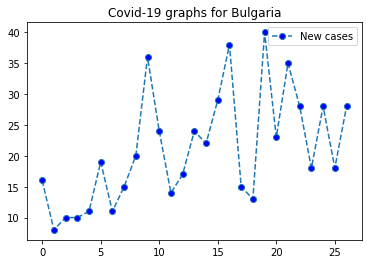

In [6]:
plt.plot(df['new'], label = "New cases",linestyle='dashed',marker='o', markerfacecolor='blue')
plt.title("Covid-19 graphs for Bulgaria")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Scatter plot')

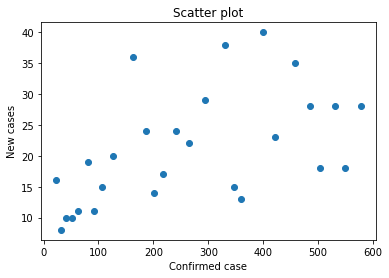

In [7]:
#plt.scatter(data['date'],df['confirmed'])
plt.scatter(df['confirmed'],df['new'])
plt.xlabel("Confirmed case")
plt.ylabel("New cases")
plt.title("Scatter plot")

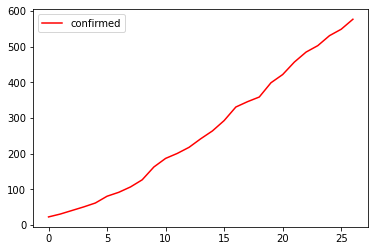

In [8]:
df.plot(kind = 'line', y = 'confirmed', color = 'red')
plt.show() #Why do we need plt.show()?

In [9]:
reg = LinearRegression().fit([[el] for el in df.index], df['confirmed'])

In [10]:
df['prediction'] = reg.predict([[el] for el in df.index])

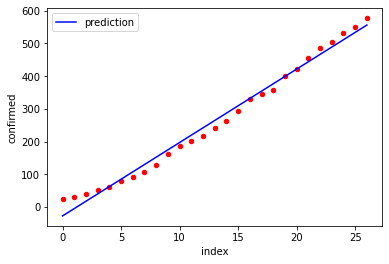

In [11]:
ax = plt.gca()
df.reset_index().plot(kind='scatter', x='index', y='confirmed', color='red', ax=ax)
df.plot(kind='line', y='prediction', color='blue', ax=ax)
plt.show()

In [12]:
x_next_5 = list(range(max(df.index) + 1, max(df.index) + 6))
next_5 = reg.predict([[el] for el in x_next_5])

In [13]:
next_5

array([578.6980057 , 601.13939764, 623.58078958, 646.02218152,
       668.46357346])

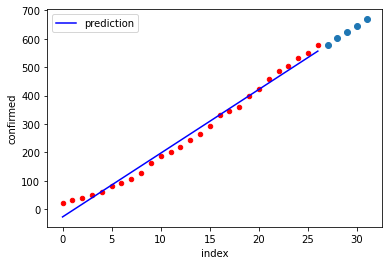

In [14]:
ax = plt.gca()
df.reset_index().plot(kind='scatter', x='index', y='confirmed', color='red', ax=ax)
df.plot(kind='line', y='prediction', color='blue', ax=ax)
ax.scatter(x=x_next_5, y=next_5)
plt.show()

In [15]:
#Trying to fit a logistic function but to my data
def f(x, a, b, c, d):
    return a / (1. + np.exp(-(x - d)/c)) + b

In [16]:
a, c = 0, 0 #np.random.exponential(size=2)
b, d = 0, 0 #np.random.randn(2)

In [17]:
n = len(df['confirmed'])
x = list(range(n))
y = df['confirmed']

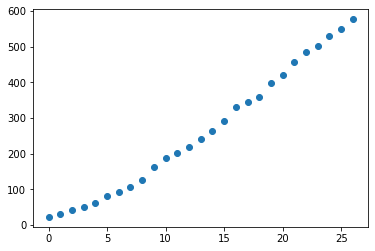

In [18]:
#plot of the data points 
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y, 'o')
plt.show()

In [19]:
#Obviously fitting a logistic function to the dataa points
(a_, b_, c_, d_), _ = opt.curve_fit(f, x, y)

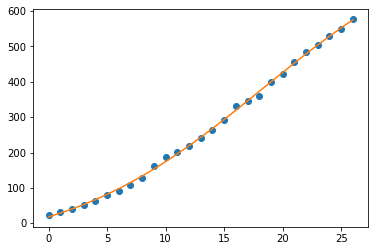

In [20]:
y_fit = f(x, a_, b_, c_, d_)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y, 'o')
ax.plot(x, y_fit, '-')
plt.show()

In [21]:
f([range(max(df.index) + 1, max(df.index) + 6)], a_, b_, c_, d_)

array([[597.11369695, 617.64795612, 637.01073011, 655.18060381,
        672.15371191]])

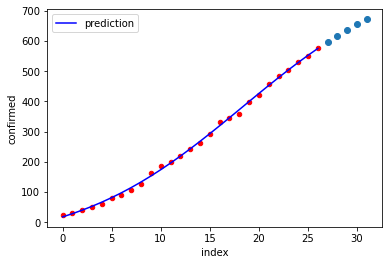

In [22]:
x_next_5 = list(range(max(df.index) + 1, max(df.index) + 6))
next_5 = f(x_next_5, a_, b_, c_, d_)
df['prediction'] = f([[el] for el in df.index], a_, b_, c_, d_)
ax = plt.gca()
df.reset_index().plot(kind='scatter', x='index', y='confirmed', color='red', ax=ax)
df.plot(kind='line', y='prediction', color='blue', ax=ax)
ax.scatter(x=x_next_5, y=next_5)
plt.show()